_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1_1 (Conv2D)             (None, 56, 56, 96)        34944     
_________________________________________________________________
act1_1 (Activation)          (None, 56, 56, 96)        0         
_________________________________________________________________
bn1_1 (BatchNormalization)   (None, 56, 56, 96)        384       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 28, 28, 96)        0         
_________________________________________________________________
do_1 (Dropout)               (None, 28, 28, 96)        0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, 28, 28, 256)       614656    
_________________________________________________________________
act2_1 (Activation)          (None, 28, 28, 256)       0         
__________

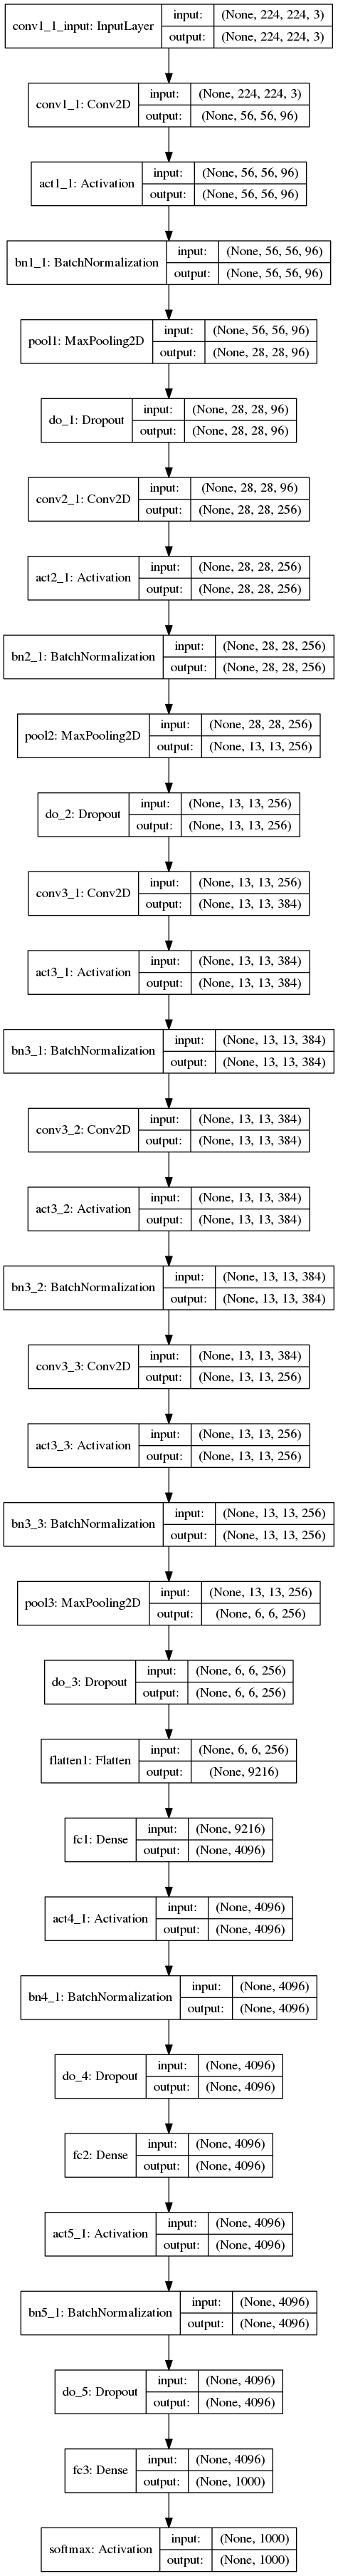

In [4]:
# AlexNet with keras

from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.core import Activation
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Dropout
from keras.layers.core import Flatten, Dense
from keras.utils import plot_model
from IPython.display import Image

height  = 224
width   = 224
depth   = 3
classes = 1000

inputShape = (height, width, depth)

model = Sequential()

# block #1 CONV => RELU => POOL
model.add(Conv2D(96, (11, 11), strides=4, padding='same', name='conv1_1', input_shape=inputShape))
model.add(Activation('relu', name='act1_1'))
model.add(BatchNormalization(axis=-1, name='bn1_1'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), name='pool1'))
model.add(Dropout(0.25, name='do_1'))


# block #2 CONV => RELU => POOL
model.add(Conv2D(256, (5, 5), padding='same', name='conv2_1'))
model.add(Activation('relu', name='act2_1'))
model.add(BatchNormalization(axis=-1, name='bn2_1'))
model.add(MaxPooling2D((3, 3), (2, 2), name='pool2'))
model.add(Dropout(0.25, name='do_2'))


# block #3 (CONV => RELU) * 3 => POOL
model.add(Conv2D(384, (3, 3), padding='same', name='conv3_1'))
model.add(Activation('relu', name='act3_1'))
model.add(BatchNormalization(axis=-1, name='bn3_1'))

model.add(Conv2D(384, (3, 3), padding='same', name='conv3_2'))
model.add(Activation('relu', name='act3_2'))
model.add(BatchNormalization(axis=-1, name='bn3_2'))

model.add(Conv2D(256, (3, 3), padding='same', name='conv3_3'))
model.add(Activation('relu', name='act3_3'))
model.add(BatchNormalization(axis=-1, name='bn3_3'))
model.add(MaxPooling2D((3, 3), strides=(2, 2), name='pool3'))
model.add(Dropout(0.25, name='do_3'))


# block #4 FC => RELU
model.add(Flatten(name='flatten1'))
model.add(Dense(4096, name='fc1'))
model.add(Activation('relu', name='act4_1'))
model.add(BatchNormalization(axis=-1, name='bn4_1'))
model.add(Dropout(0.5, name='do_4'))


# block #5 FC => RELU
model.add(Dense(4096, name='fc2'))
model.add(Activation('relu', name='act5_1'))
model.add(BatchNormalization(axis=-1, name='bn5_1'))
model.add(Dropout(0.5, name='do_5'))


# softmax classifier
model.add(Dense(classes, name='fc3'))
model.add(Activation('softmax', name='softmax'))



model.summary()
plot_model(model, to_file='AlexNet.png', show_shapes=True)
Image('AlexNet.png')